In [29]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [30]:
DATADIR = 'E:\\datasets\\fruits'
CATEGORIES = ["amra", "jolpai","kamranga","peyera"]

In [39]:
training_data = []
IMG_SIZE = 100

for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                training_data.append([new_array, class_num]) 
            except Exception as e: 
                pass

100%|███████████████████████████████████████████████████████████████████████████████| 286/286 [00:00<00:00, 513.23it/s]


In [40]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)



X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [41]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

In [55]:
model2 = Sequential()

model2.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,1)))
model2.add(MaxPooling2D(2))

model2.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,1)))
model2.add(MaxPooling2D(2))

model2.add(Flatten())
model2.add(Dense(4,activation='softmax'))


In [56]:
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [64]:
training = model2.fit(X, y, epochs=5, validation_split=0.2)

Train on 1070 samples, validate on 268 samples
Epoch 1/5
1070/1070 [==============================] - 15s 14ms/sample - loss: 0.0068 - acc: 1.0000 - val_loss: 0.9160 - val_acc: 0.8060
Epoch 2/5
1070/1070 [==============================] - 15s 14ms/sample - loss: 0.0055 - acc: 1.0000 - val_loss: 1.1584 - val_acc: 0.7500
Epoch 3/5
1070/1070 [==============================] - 15s 14ms/sample - loss: 0.0058 - acc: 0.9991 - val_loss: 0.8256 - val_acc: 0.8321
Epoch 4/5
1070/1070 [==============================] - 15s 14ms/sample - loss: 0.0061 - acc: 1.0000 - val_loss: 0.7683 - val_acc: 0.8507
Epoch 5/5
1070/1070 [==============================] - 15s 14ms/sample - loss: 0.0041 - acc: 1.0000 - val_loss: 1.3457 - val_acc: 0.6903


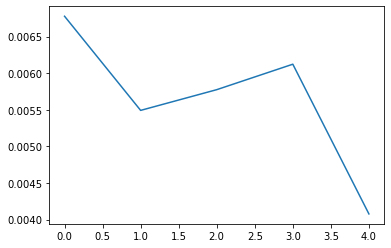

In [65]:
plt.plot(training.history['loss'])

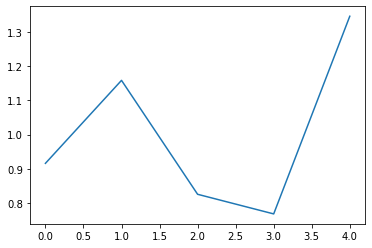

In [66]:
plt.plot(training.history['val_loss'])

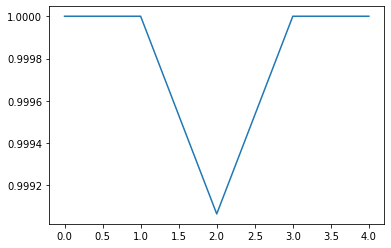

In [70]:
plt.plot(training.history['acc'])

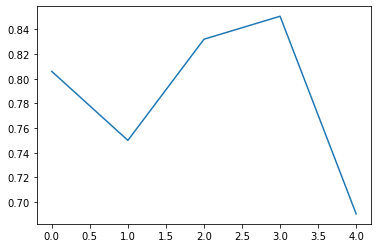

In [71]:
plt.plot(training.history['val_acc'])